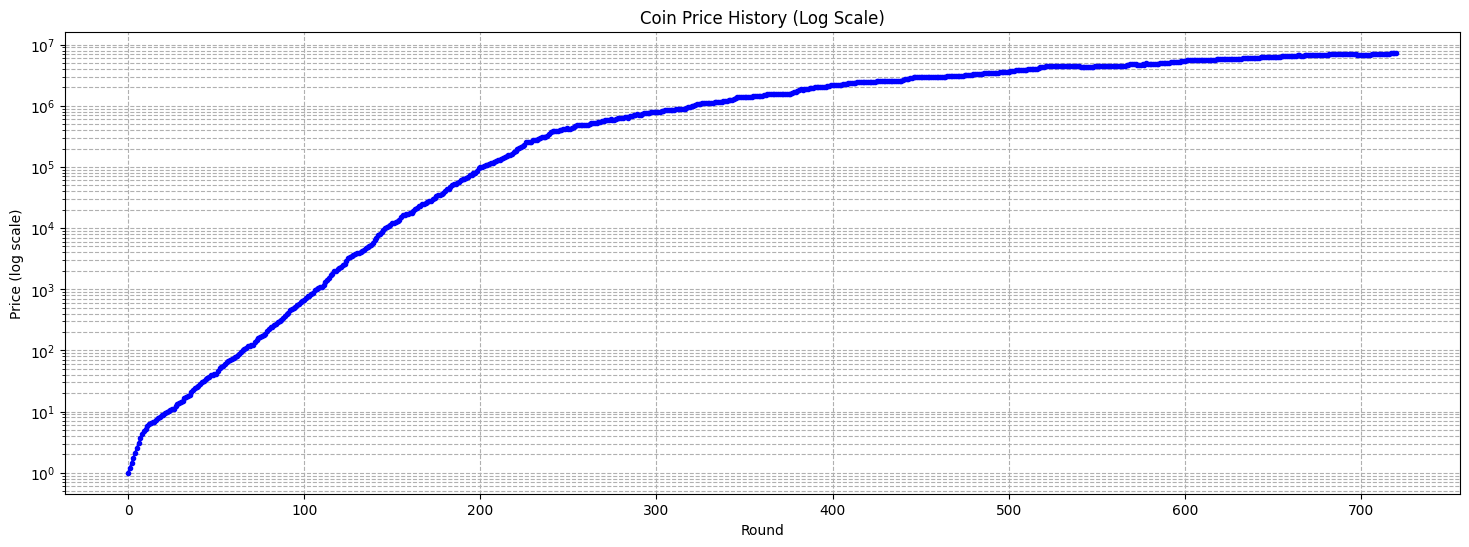

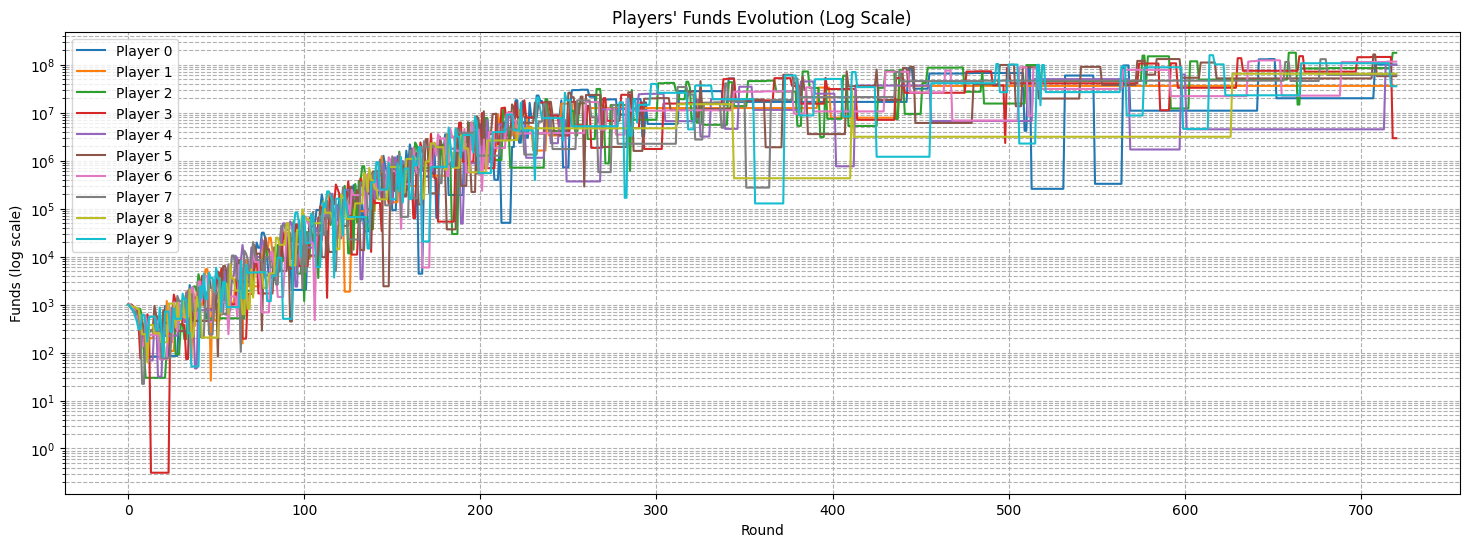

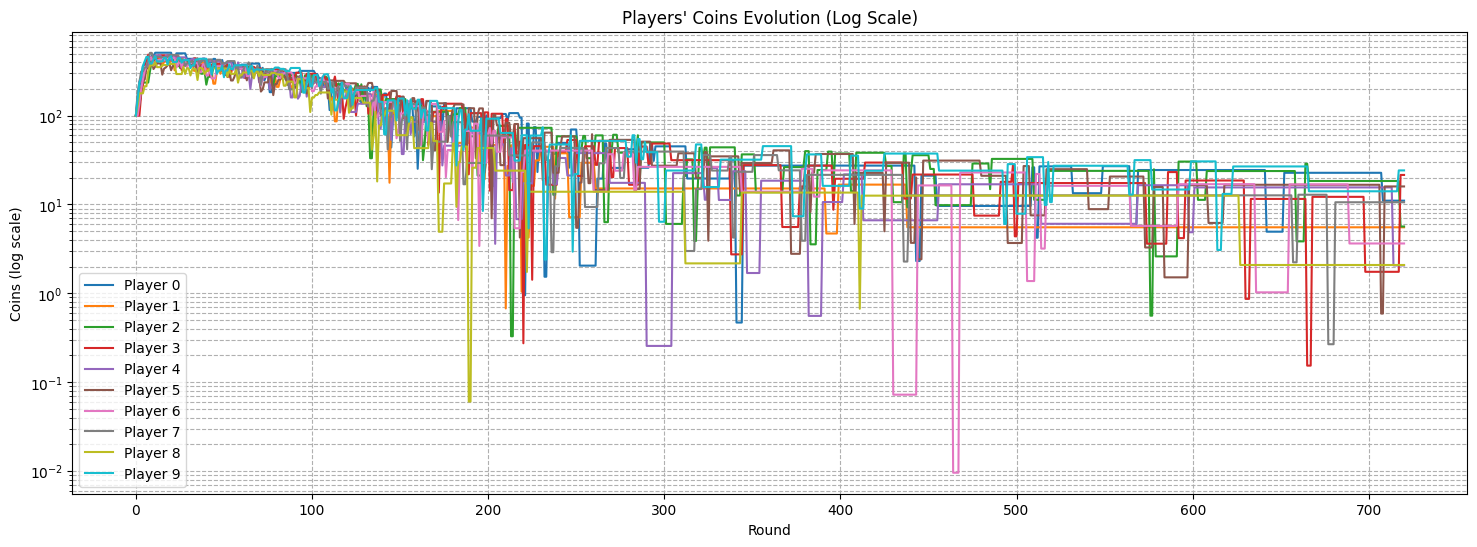

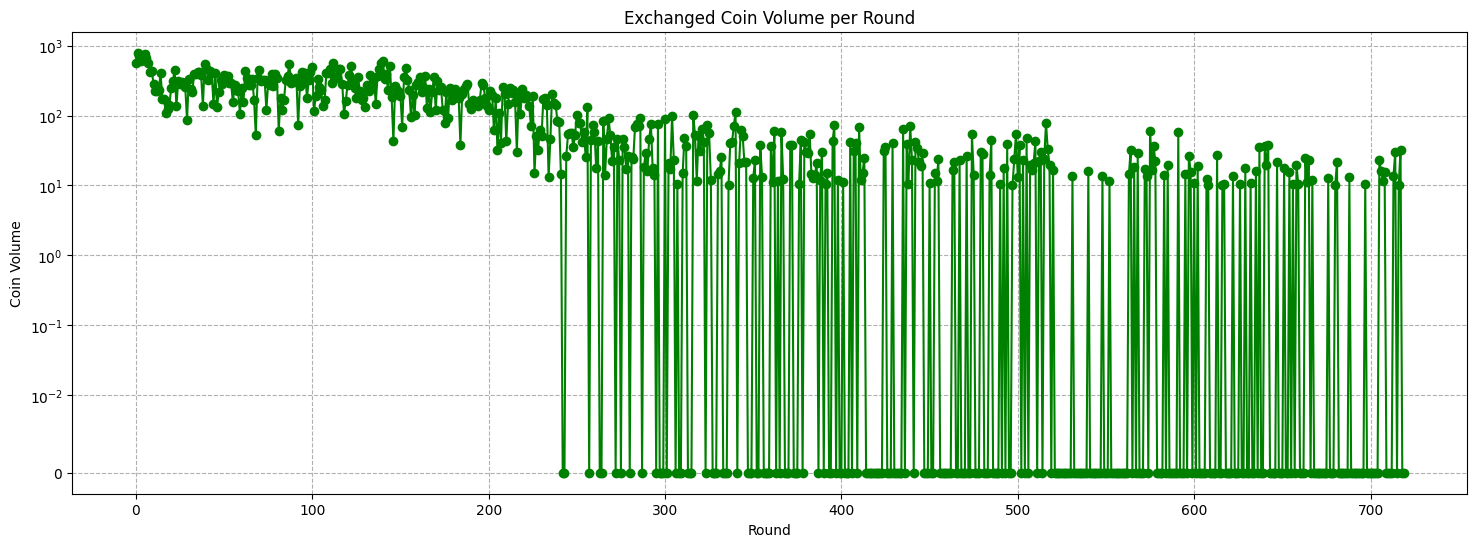

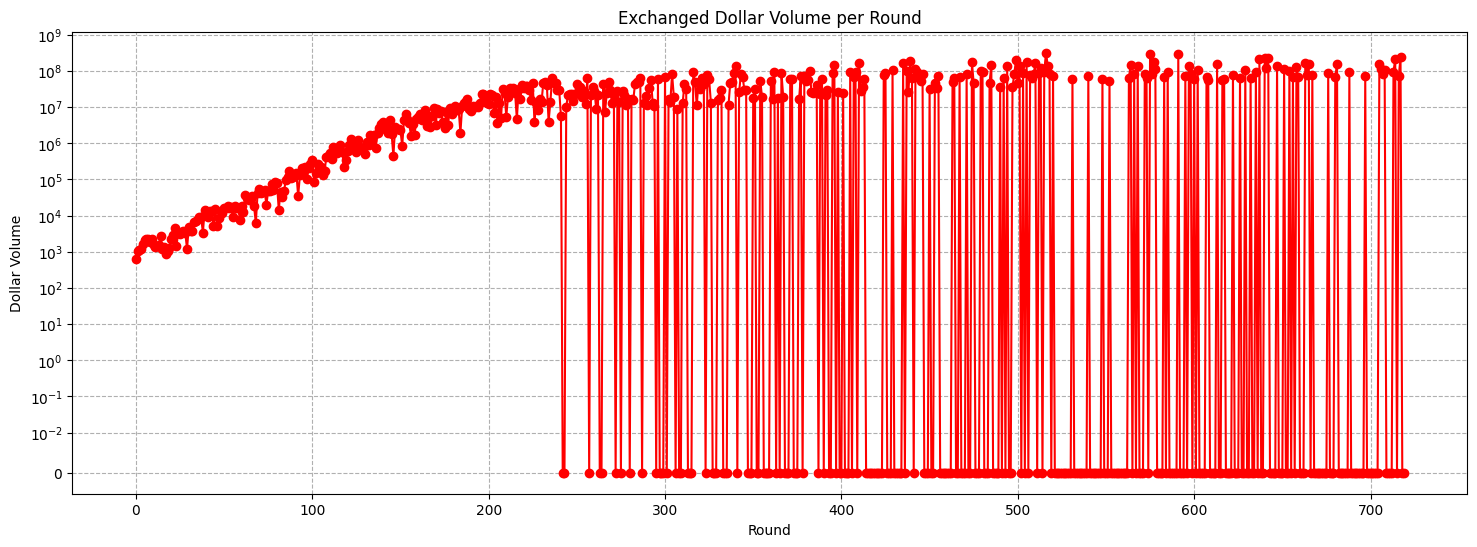


Final state of each player:
Player 0: Funds = 101232597.92, Coins = 11.04, Total Asset Value = 182531877.16
Player 1: Funds = 36315048.75, Coins = 5.54, Total Asset Value = 77093405.25
Player 2: Funds = 177775117.33, Coins = 5.65, Total Asset Value = 219411491.08
Player 3: Funds = 2951207.59, Coins = 21.51, Total Asset Value = 161333884.01
Player 4: Funds = 99633221.39, Coins = 2.06, Total Asset Value = 114816869.62
Player 5: Funds = 58040462.13, Coins = 15.96, Total Asset Value = 175586527.63
Player 6: Funds = 116392090.02, Coins = 3.64, Total Asset Value = 143196831.22
Player 7: Funds = 61738123.85, Coins = 10.59, Total Asset Value = 139760668.13
Player 8: Funds = 65079537.10, Coins = 2.08, Total Asset Value = 80428771.99
Player 9: Funds = 35717607.77, Coins = 24.19, Total Asset Value = 213869853.08


In [1]:
import random
import logging
import argparse
import matplotlib.pyplot as plt

# Configure logging for detailed output during simulation
# Save logs to transactions.txt
logging.basicConfig(filename='./transactions.txt', level=logging.DEBUG,
                    format='%(asctime)s - %(levelname)s - %(message)s')

class Player:
    """
    Represents a market participant with funds and coin holdings.
    """
    def __init__(self, player_id: int, initial_funds: float, initial_coins: float):
        self.id = player_id
        self.funds = initial_funds
        self.coins = initial_coins

    def buy(self, amount: float, price: float) -> bool:
        """
        Attempt to buy a specified amount of coins at the given price.
        Returns True if the purchase was successful.
        """
        cost = amount * price
        if self.funds >= cost:
            self.funds -= cost
            self.coins += amount
            return True
        return False

    def sell(self, amount: float, price: float) -> bool:
        """
        Attempt to sell a specified amount of coins at the given price.
        Returns True if the sale was successful.
        """
        if self.coins >= amount:
            self.funds += amount * price
            self.coins -= amount
            return True
        return False


class CoinMarket:
    """
    Simulates a coin market with a fixed total supply and strategic trading behavior.

    Each player is designed to buy aggressively to push the coin's price upward while
    selling infrequently to minimize negative price impacts.
    """
    def __init__(self, num_players: int = 10, initial_funds: float = 1000.0,
                 initial_price: float = 1.0, total_supply: int = 1000000):
        self.price = initial_price
        self.total_supply = total_supply
        self.players = []
        # Distribute initial coins evenly among players
        initial_coins = (initial_funds / initial_price) / num_players
        for i in range(num_players):
            self.players.append(Player(i, initial_funds, initial_coins))
        self.price_history = [self.price]
        # Dictionaries to track players' funds and coins evolution over rounds
        self.funds_history = {player.id: [player.funds] for player in self.players}
        self.coins_history = {player.id: [player.coins] for player in self.players}
        # Lists to track exchanged volumes per round (in coins and dollars)
        self.coin_volume_history = []
        self.dollar_volume_history = []

    def record_player_states(self):
        """
        Records the current funds and coins for each player.
        """
        for player in self.players:
            self.funds_history[player.id].append(player.funds)
            self.coins_history[player.id].append(player.coins)

    def strategic_trade(self):
        """
        Executes a trade cycle where each player makes a strategic decision:
        - Buys coins if sufficient funds are available, aggressively pushing the price up.
        - Occasionally sells coins to balance holdings while minimizing downward price impact.

        Also tracks the exchanged volumes (in coins and dollars) for the round.
        """
        round_coin_volume = 0
        round_dollar_volume = 0

        for player in self.players:
            trade_amount = random.uniform(10, 100)
            # Attempt to buy if the player has sufficient funds
            if player.funds >= trade_amount * self.price:
                if player.buy(trade_amount, self.price):
                    volume_dollar = trade_amount * self.price
                    round_coin_volume += trade_amount
                    round_dollar_volume += volume_dollar
                    # Increase the price significantly on a successful buy
                    old_price = self.price
                    self.price *= 1.02
                    logging.info(f'Player {player.id} bought {trade_amount:.2f} coins at price {old_price:.2f}, new price: {self.price:.2f}')
            # Sell with a lower probability to avoid strong downward pressure
            if player.coins >= trade_amount and random.random() < 0.3:
                if player.sell(trade_amount, self.price):
                    volume_dollar = trade_amount * self.price
                    round_coin_volume += trade_amount
                    round_dollar_volume += volume_dollar
                    # Decrease the price slightly on a successful sell
                    old_price = self.price
                    self.price *= 0.995
                    logging.info(f'Player {player.id} sold {trade_amount:.2f} coins at price {old_price:.2f}, new price: {self.price:.2f}')
        self.price_history.append(self.price)
        return round_coin_volume, round_dollar_volume

    def simulate(self, rounds: int = 100):
        """
        Runs the simulation for a specified number of rounds.
        Returns the price history, funds history, coins history,
        coin volume history, and dollar volume history.
        """
        for round_num in range(rounds):
            coin_volume, dollar_volume = self.strategic_trade()
            self.coin_volume_history.append(coin_volume)
            self.dollar_volume_history.append(dollar_volume)
            self.record_player_states()
            logging.info(f'After round {round_num + 1}, Price: {self.price:.2f}')
        return (self.price_history, self.funds_history, self.coins_history,
                self.coin_volume_history, self.dollar_volume_history)


def plot_price_history(price_history: list):
    """
    Plots the coin's price history using matplotlib with the y-axis in logarithmic scale.
    """
    plt.figure(figsize=(18, 6))
    plt.plot(price_history, marker='.',  color='b')
    plt.yscale('log')  # Set the y-axis to a logarithmic scale
    plt.title('Coin Price History (Log Scale)')
    plt.xlabel('Round')
    plt.ylabel('Price (log scale)')
    plt.grid(True, which="both", ls="--")
    plt.show()


def plot_player_evolution(funds_history: dict, coins_history: dict):
    """
    Plots the evolution of each player's funds and coins over time using a logarithmic y-axis.
    """
    rounds = range(len(next(iter(funds_history.values()))))

    # Plot funds evolution for each player
    plt.figure(figsize=(18, 6))
    for player_id, funds in funds_history.items():
        plt.plot(rounds, funds, label=f'Player {player_id}')
    plt.yscale('log')
    plt.title("Players' Funds Evolution (Log Scale)")
    plt.xlabel('Round')
    plt.ylabel('Funds (log scale)')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()

    # Plot coins evolution for each player
    plt.figure(figsize=(18, 6))
    for player_id, coins in coins_history.items():
        plt.plot(rounds, coins, label=f'Player {player_id}')
    plt.yscale('log')
    plt.title("Players' Coins Evolution (Log Scale)")
    plt.xlabel('Round')
    plt.ylabel('Coins (log scale)')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    plt.show()

def plot_exchanged_volumes(coin_volume_history: list, dollar_volume_history: list):
    """
    Plots the exchanged volumes (in coins and dollars) over time using a symlog y-axis,
    which shows small values (within the linear threshold) as well as large ones.
    """
    rounds = range(len(coin_volume_history))

    # Plot coin volume exchanged per round
    plt.figure(figsize=(18, 6))
    plt.plot(rounds, coin_volume_history, marker='o', linestyle='-', color='g')
    plt.title("Exchanged Coin Volume per Round")
    plt.xlabel("Round")
    plt.ylabel("Coin Volume")
    # Use symlog scale to prevent small values from being hidden; adjust linthresh as needed
    plt.yscale('symlog', linthresh=1e-2)
    plt.grid(True, which="both", ls="dashed")
    plt.show()

    # Plot dollar volume exchanged per round
    plt.figure(figsize=(18, 6))
    plt.plot(rounds, dollar_volume_history, marker='o', linestyle='-', color='r')
    plt.title("Exchanged Dollar Volume per Round")
    plt.xlabel("Round")
    plt.ylabel("Dollar Volume")
    plt.yscale('symlog', linthresh=1e-2)
    plt.grid(True, which="both", ls="dashed")
    plt.show()



def main():
    parser = argparse.ArgumentParser(description='Simulate a coin market with strategic trading behavior.')
    parser.add_argument('--rounds', type=int, default=720, help='Number of simulation rounds')
    parser.add_argument('-f', default="", help='adapt for collab')
    args = parser.parse_args()

    market = CoinMarket()
    (price_history, funds_history, coins_history,
     coin_volume_history, dollar_volume_history) = market.simulate(rounds=args.rounds)

    plot_price_history(price_history)
    plot_player_evolution(funds_history, coins_history)
    plot_exchanged_volumes(coin_volume_history, dollar_volume_history)

    # Final printout of each player's assets
    print("\nFinal state of each player:")
    for player in market.players:
        total_assets = player.funds + player.coins * market.price
        print(f"Player {player.id}: Funds = {player.funds:.2f}, Coins = {player.coins:.2f}, Total Asset Value = {total_assets:.2f}")


if __name__ == '__main__':
    main()
